In [60]:
#import warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import shutil
from matplotlib.image import imread
from sklearn.model_selection import train_test_split

In [2]:
local_zip = 'D:/train.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

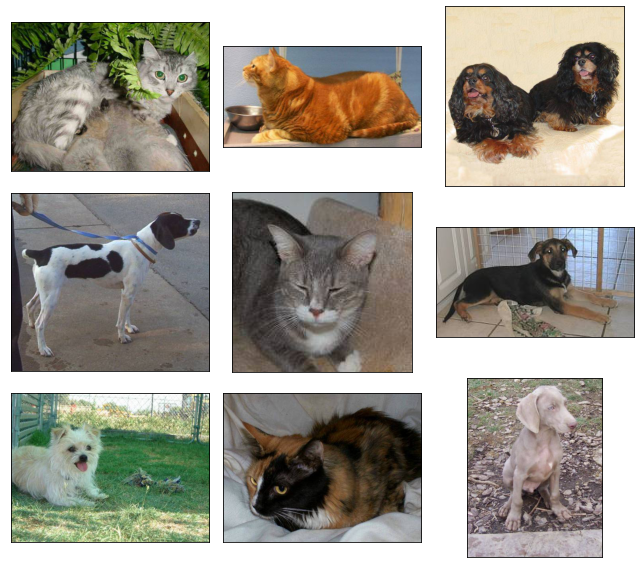

In [19]:
train_dir = '/tmp/train/'

plt.figure(figsize=(9, 8))
for i in range(9):
    plt.subplot(331 + i)
    filename = random.choice([train_dir + x for x in os.listdir(train_dir)])
    img = imread(filename)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
plt.tight_layout()

In [11]:
pet_images = './pet-images'
cats = os.path.join(pet_images,'cat')
dogs = os.path.join(pet_images,'dog')
os.mkdir(pet_images)
os.mkdir(cats)
os.mkdir(dogs)

In [14]:
for i in os.listdir(train_dir):
    if i.split('.')[0] == 'cat':
        src = os.path.join(train_dir,i)
        dst = os.path.join(cats,i)
        shutil.copyfile(src,dst)
    elif i.split('.')[0] == 'dog':
        src = os.path.join(train_dir,i)
        dst = os.path.join(dogs,i)
        shutil.copyfile(src,dst)

In [27]:
targets=list()
full_paths=list()
for file_name in os.listdir(train_dir):
    target=file_name.split(".")[0]
    full_path=os.path.join(train_dir, file_name)
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets


In [37]:
dataset.sample(10)

,image_path,target
9236,/tmp/train/cat.7060.jpg,cat
5416,/tmp/train/cat.3622.jpg,cat
731,/tmp/train/cat.10655.jpg,cat
16157,/tmp/train/dog.2039.jpg,dog
2443,/tmp/train/cat.12196.jpg,cat
19948,/tmp/train/dog.5451.jpg,dog
1886,/tmp/train/cat.11695.jpg,cat
5507,/tmp/train/cat.3704.jpg,cat
16961,/tmp/train/dog.2763.jpg,dog
21285,/tmp/train/dog.6655.jpg,dog


In [44]:
Target_c = dataset['target'].value_counts()
print("Number of cats in the dataset: {}".format(Target_c['cat']))
print("Number of dogs in the dataset: {}".format(Target_c['dog']))

Number of cats in the dataset: 12500
Number of dogs in the dataset: 12500


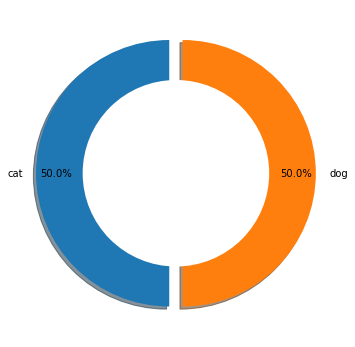

In [63]:
plt.figure(figsize = (5,5))
#explsion
plt.pie(Target_c , labels = ['cat', 'dog'] , autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05), shadow = True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [61]:
dataset_train, dataset_test=train_test_split(dataset,test_size=0.2,random_state=42)